In [1]:
# Run in python console
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/monica/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import json

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Stop Words - 
Some examples of stop words are: "a," "and," "but," "how," "or," and "what." While the majority of all Internet search engines utilize stop words, they do not prevent a user from using them, but they are ignored

In [3]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use','efter'])

In [4]:
df = pd.read_csv(r'high_csv.csv',sep=';')
print(df.caption.unique())
df


["We can't wait to explore 2019 with you⭐ #bolia #newyear"
 'All time favorite Scandi girls @_jeanettemadsen_  and @thora_valdimars in all time favorite Scandi sofa🧡 #MRBIG'
 'The DT18 bench is a unique combination of solid craftsmanship and materials of the highest quality. The wooden bench always has room for one more and creates a feeling of instant cosiness and well-being around the dining table. To spice it up with some extra comfort, add a Quattro traceable leather cushion in either black or cognac. #bolia #dt #bench'
 ...
 'Jimmy\'s motto was "Don\'t hide your mess. Display it" #Caja #smallstorage #thedesignsale #bolia'
 "The girly version of Don Draper's favourite sofa #Madison #thedesignsale #bolia"
 'North sofa by Danish design duo Glismand & Rüdiger #thedesignsale #greatprice #bolia']


,s_no,id,ig_id,comments_count,like_count,media_type,media_url,permalink,timestamp,year,caption,hashtag_caption,comments_text,type
0,268,18001662571109024,1946370643935962466,5,393,IMAGE,https://scontent.xx.fbcdn.net/v/t50.2886-16/49...,https://www.instagram.com/p/BsC5cnRDSVi/,2018-12-31T08:38:16+0000,2018,We can't wait to explore 2019 with you⭐ #bolia...,"[#bolia, #newyear]",👌$!!!!!!!!!!!$🎆🎉👌$Well presented$Love your vid...,high
1,269,17990956690137231,1945153574590660627,12,547,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/47...,https://www.instagram.com/p/Br-kt7HDsAT/,2018-12-29T16:19:57+0000,2018,All time favorite Scandi girls @_jeanettemadse...,[#MRBIG],@jens.r.kristiansen fargen!$Traumhaft 😍❤️$Hell...,high
2,270,18014768944018933,1944173682877023828,2,445,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/47...,https://www.instagram.com/p/Br7F6n1jEZU/,2018-12-28T07:53:05+0000,2018,The DT18 bench is a unique combination of soli...,"[#bolia, #dt, #bench]",❤️❤️❤️$exceptional image. 😍$,high
3,271,18015642838041754,1942797623531357358,4,769,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/47...,https://www.instagram.com/p/Br2NCUtD0Su/,2018-12-26T10:19:06+0000,2018,It’s up to you whether you want your Scandinav...,"[#bolia, #scandinaviaremix, #sofa]",😉 × 😎$Love ❤️ that 👍👍 so cosy$Very very nice s...,high
4,272,17987532352186514,1941218233059925354,2,488,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/47...,https://www.instagram.com/p/Brwl7KtDF1q/,2018-12-24T06:01:08+0000,2018,Graphic and beautiful in its simplicity. The X...,"[#bolia, #xstool, #stool]",Very nice👌🏻$Strong inspiration from Sori Yanag...,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,1490,17841666571015891,660707653557497783,7,249,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/19...,https://www.instagram.com/p/krThw-rS-3/,2014-02-21T11:35:11+0000,2014,It's here! Bolia Spring Collection 2014. 🌷 See...,[],👌😍$@anneboll den kommer allerede i midten af n...,high
1226,1493,17841666574015891,654459022013705980,8,316,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/17...,https://www.instagram.com/p/kVGwNXLS78/,2014-02-12T20:40:16+0000,2014,Orlando is a luxury modular sofa. You decide e...,[],@lundhmarie$Got one and very happy! :)$@postso...,high
1227,1494,17841566872015891,652971701867195418,5,321,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/17...,https://www.instagram.com/p/kP0k2iLSwa/,2014-02-10T19:25:14+0000,2014,"Jimmy's motto was ""Don't hide your mess. Displ...","[#Caja, #smallstorage, #thedesignsale, #bolia]",I like that$@boliacom Do you have more these? ...,high
1228,1495,17841975748015891,651340955792518311,8,260,IMAGE,https://scontent.xx.fbcdn.net/v/t51.2885-15/16...,https://www.instagram.com/p/kKByX5rSyn/,2014-02-08T13:25:14+0000,2014,The girly version of Don Draper's favourite so...,"[#Madison, #thedesignsale, #bolia]",@heidiwittus$👏😍$! @beatewahl$#lampilove i f***...,high


In [5]:
df['data'] = df.caption.tolist()

In [6]:
# Convert to list

data = df.caption.tolist()

df['data'] = [re.sub('\s*@\s*\s?', ' ', str(sent)) for sent in df['data']]

df['data'] = [re.sub('\?', ' ', str(sent)) for sent in df['data']]

df['data'] = [re.sub('\_', ' ', str(sent)) for sent in df['data']]

df['data'] = [re.sub('@"[\d-]"', ' ', str(sent)) for sent in df['data']]

# Remove new line characters
df['data'] = [re.sub('\s+', ' ', str(sent)) for sent in df['data']]

# Remove distracting single quotes
df['data'] = [re.sub("\'", " ", str(sent)) for sent in df['data']]

df['data']=df['data'].str.lower()

In [7]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[:1])

[['we', 'can', 'wait', 'to', 'explore', 'with', 'you', 'bolia', 'newyear']]


# Unigram, Bigram, Trigram
A 1-gram (or unigram) is a one-word sequence. For the above sentence, the unigrams would simply be: “I”, “love”, “reading”, “blogs”, “about”, “data”, “science”, “on”.

A 2-gram (or bigram) is a two-word sequence of words, like “I love”, “love reading”. 

And a 3-gram (or trigram) is a three-word sequence of words like “I love reading”, “about data science”.

In [8]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['we', 'can', 'wait', 'to', 'explore', 'with', 'you', 'bolia', 'newyear']


# Lemmatization 
It usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma .

In [9]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [10]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['can', 'wait', 'explore', 'newyear']]


# Term Document Frequency:

Suppose we have a set of English text documents and wish to rank which document is most relevant to the query , “Data Science is awesome !” A simple way to start out is by eliminating documents that do not contain all three words “Data”,”is”, “Science”, and “awesome”, but this still leaves many documents. To further distinguish them, we might count the number of times each term occurs in each document; the number of times a term occurs in a document is called its term frequency.
T

In [11]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1)]]


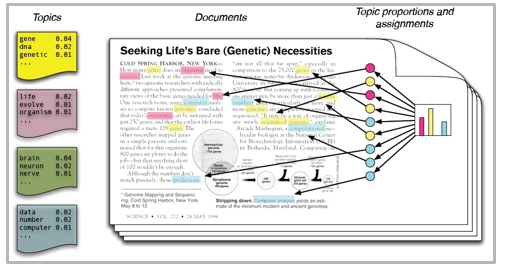

# Topic modeling:

The process of identifying topics in a set of documents. This can be useful for search engines, customer service automation, and any other instance where knowing the topics of documents is important.
Steps :

1. Assume there are k topics across all of the documents
2. Distribute these k topics across document m (this distribution is known as α and can be symmetric or asymmetric, more on this later) by assigning each word a topic.
3. For each word w in document m, assume its topic is wrong but every other word is assigned the correct topic.
4. Probabilistically assign word w a topic based on two things:
- what topics are in document m
- how many times word w has been assigned a particular topic across all of the documents (this distribution is called β, more on this later)
5. Repeat this process a number of times for each document and you’re done!

In [12]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=80,
                                           alpha='auto',
                                           per_word_topics=True)

In [13]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"table" + 0.027*"chair" + 0.027*"design" + 0.021*"dining" + '
  '0.016*"make" + 0.013*"storage" + 0.012*"wood" + 0.011*"solid" + '
  '0.011*"create" + 0.010*"expression"'),
 (1,
  '0.048*"sofa" + 0.034*"design" + 0.012*"soft" + 0.011*"colour" + '
  '0.011*"just" + 0.010*"year" + 0.010*"good" + 0.010*"let" + 0.010*"come" + '
  '0.010*"can"'),
 (2,
  '0.047*"new" + 0.036*"design" + 0.020*"collection" + 0.018*"store" + '
  '0.017*"love" + 0.016*"can" + 0.015*"will" + 0.011*"beautiful" + 0.010*"see" '
  '+ 0.010*"make"'),
 (3,
  '0.021*"light" + 0.017*"marble" + 0.015*"here" + 0.012*"time" + 0.011*"even" '
  '+ 0.011*"lamp" + 0.010*"guest" + 0.009*"back" + 0.009*"home" + '
  '0.008*"name"'),
 (4,
  '0.019*"vase" + 0.016*"space" + 0.015*"little" + 0.013*"boliacom" + '
  '0.012*"home" + 0.012*"flower" + 0.010*"most" + 0.009*"may" + 0.009*"green" '
  '+ 0.008*"here"')]


# Perplexity
Given a trained model, perplexity tries to measure how this model is surprised when it is given a new dataset. This is measured as the normalized log-likelihood of the held out test set. The lower the perplexity, the better the model.

# Coherence
The coherence of a topic by measuring the degree of semantic similarity between its high scoring words. 

In [14]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -7.356937554390964

Coherence Score:  0.35337039802710735


In [15]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.208848  0.103922       1        1  29.185703
2      0.105595 -0.267273       2        1  27.285061
0      0.056581  0.147113       3        1  19.925583
4     -0.166002  0.039057       4        1  13.187854
3     -0.205022 -0.022819       5        1  10.415797, topic_info=           Term        Freq       Total Category  logprob  loglift
49         sofa  275.000000  275.000000  Default  30.0000  30.0000
90          new  251.000000  251.000000  Default  29.0000  29.0000
31        table  127.000000  127.000000  Default  28.0000  28.0000
169       chair  106.000000  106.000000  Default  27.0000  27.0000
493  collection  105.000000  105.000000  Default  26.0000  26.0000
..          ...         ...         ...      ...      ...      ...
62         home   17.741671   49.887901   Topic5  -4.7403   1.2280
243        very   11.007804   47.401962   Topic5  -5.2176   0.8018
378         why    8.937201   24.420692   Topic5  -5.4259   1.2566
89         make    9.228900  150.500488   Topic5  -5.3938  -0.5298
130         fit    8.221167   22.534845   Topic5  -5.5095   1.2535

[237 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
620       1  0.973553  aesthetic
214       5  0.971459     almost
1004      4  0.952795    amazing
669       1  0.967072   armchair
2472      5  0.899959     artist
...     ...       ...        ...
1367      2  0.973189     winner
204       3  0.987288       wood
35        3  0.971609     wooden
188       3  0.965225      would
97        1  0.993622       year

[253 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 3, 1, 5, 4])

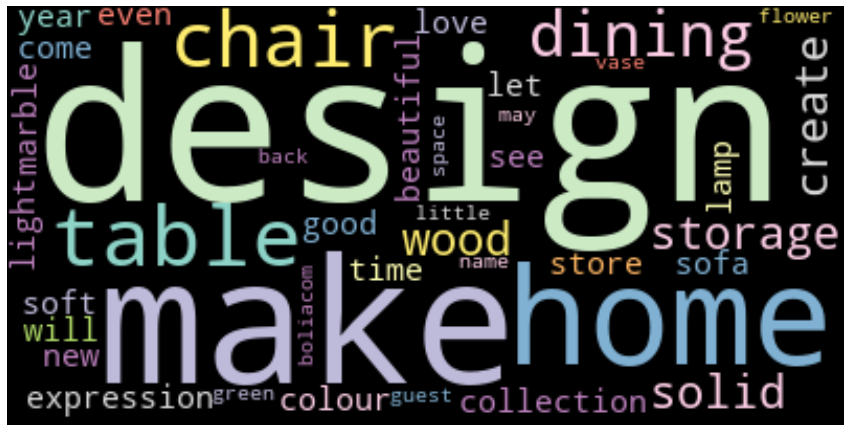

In [16]:
from wordcloud import WordCloud

from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in lda_model.print_topics())
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()